In [2]:
import mreels
import matplotlib.pyplot as plt
import numpy as np

In [3]:
eels_stack_low = mreels.MomentumResolvedDataStack('n-inse_C1_EFTEM-SI-003 [-3,36] eV.dm4')
eels_stack_high = mreels.MomentumResolvedDataStack('n-inse_C1_EFTEM-SI-004 [-3,36] eV.dm4')
#eels_scope = mreels.ImagingSetup('n-inse_C1_EFTEM-SI-001 [-3,36] eV.dm4')

In [4]:
eels_stack_high.stack.dtype

dtype('float32')

In [5]:
print(eels_stack_high.stack[0])

[[ 19.831928  -33.955196  -24.221737  ...  76.117516   25.55674
   91.64224  ]
 [-11.316464    7.4355    -28.31118   ...  27.195553   35.01526
   68.59242  ]
 [-20.391926   17.07703    12.088132  ...  59.668648   55.153675
   58.29309  ]
 ...
 [-64.60868    33.453312    3.981583  ...  -1.8461647 -13.157648
   -4.041261 ]
 [ 47.186882   10.240517   -8.89514   ... -11.851537   42.203926
   51.493156 ]
 [-55.028698   45.60088    60.68069   ...  57.714447   37.92996
   51.995438 ]]


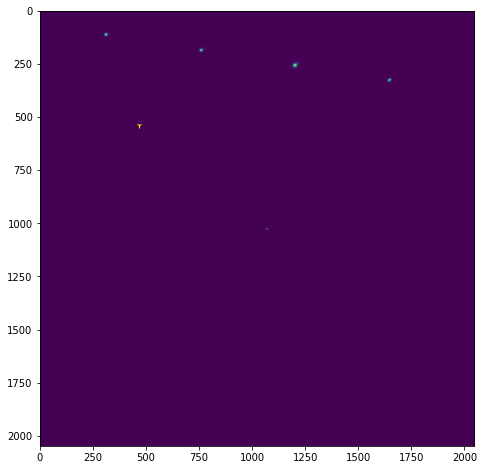

In [7]:
plt.imshow(eels_stack_low.stack[5].T)
plt.plot(467, 537, marker="1", markersize=6, color='yellow')
plt.gcf().set_size_inches((8,8))

In [8]:
true_centre = mreels.get_true_centres(eels_stack_low.stack[25], ((500,500),(980,1370)))
print(true_centre)

[467 537 1028 1385]


In [41]:
centre = eels_stack_high.get_centre(25)
print(centre)
my, mx = (1071-471)/2+471, (1023-533)/2+533
disty, distx = my-centre[0], mx-centre[1]

(1071, 1023)


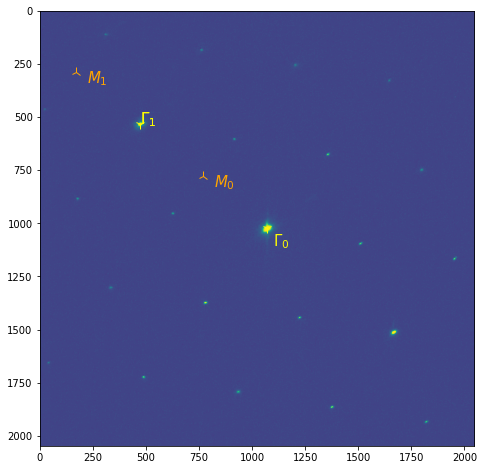

In [43]:
plt.imshow(mreels.sigmoid(eels_stack_high.stack[24]).T)
plt.plot(1071, 1023, marker='1', markersize=10, color='yellow')
plt.text(1100, 1105, r'$\Gamma_0$', color='yellow', fontsize=15)
plt.plot(471, 533, marker="1", markersize=10, color='yellow')
plt.text(471, 533, r'$\Gamma_1$', color='yellow', fontsize=15 )
plt.plot(my, mx, marker='2', markersize=10, color='orange')
plt.text(my+50, mx+50, r'$M_0$', fontsize=15, color='orange')
plt.text(471, 533, r'$\Gamma_1$', color='yellow', fontsize=15 )
plt.plot(my+disty*2, mx+distx*2, marker='2', markersize=10, color='orange')
plt.text(my+50+disty*2, mx+distx*2+50, r'$M_1$', fontsize=15, color='orange')
plt.gcf().set_size_inches((8,8))

In [45]:
inty = my+2*disty
intx = mx+2*distx
print(inty, intx)

171.0 288.0


In [30]:
true_centre_ = mreels.get_true_centres(eels_stack_high.stack[25], ((500,500),(500,500)), leeway=100)
print(true_centre_)

[471 533 471 533]


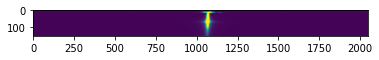

In [48]:
plt.imshow( mreels.sigmoid( eels_stack_high.stack[:,:,1023]))